## Neural Network with decision boundary


In [42]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

In [43]:
# Method to split data into 70% Train and 30% Test data
def split_data(df, X, Y):
    arr_rand = np.random.rand(df.shape[0])
    split = arr_rand < np.percentile(arr_rand, 70)
    
    X_train = X[split]
    Y_train = Y[split]
    X_test =  X[~split]
    Y_test = Y[~split]

    return X_train, Y_train, X_test, Y_test

In [44]:
# Read data from the binary data file
data = pd.read_csv('hw3data', sep="\t", header=None)
# Creating a column for initial bias values
x = np.hstack((np.ones((data.shape[0], 1)), data.drop(data.columns[2], axis=1)))
y = data[2]
# Convert Class-1 and Class-2 into 0's and 1's
for i, val in enumerate(y):
    if val == "Class-1":
        y[i] = 0
    else:
        y[i] = 1
# Splitting the data
X_train, Y_train, X_test, Y_test = split_data(data, x, y)      

/Users/neeraj/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/neeraj/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [45]:
# Sigmoid activation function
def activation_func(value):
    return (1 / (1 + np.exp(-value)))

In [46]:
# Function to return mean squared error
def mse(y_predicted, Y_test):
    return np.sum((y_predicted - Y_test) ** 2) / len(y_predicted)

In [47]:
# Derivative of sigmoid function
def sigmoid_derivative(val):
    return activation_func(val) * (1 - activation_func(val))

In [48]:
# Method to predict y-values, test error, and accuracy
def predict_values(X_test, Y_test, weights):
    weights_1 = weights[0]
    weights_2 = weights[1]
    n = Y_test.shape[0]
    Y_test = np.array(Y_test).reshape(n, 1)
    
    # Forward pass
    z_1 = np.dot(X_test, weights_1)
    act_1 = activation_func(z_1)
    z_2 = np.dot(act_1, weights_2)
    y_predicted = activation_func(z_2)
    
    # Calculating the test error
    test_error = mse(y_predicted, Y_test)
    
    ctr = 0
    # Returning values in 0's and 1's
    for i, val in enumerate(y_predicted):
        if val >= 0.5:
            y_predicted[i] = 1
        else:
            y_predicted[i] = 0
    for i, val in enumerate(y_predicted):
        if y_predicted[i] == Y_test[i]:
            ctr += 1
    
    # Number of values matched
    print('CORRECT', ctr)
    accuracy = (ctr / len(Y_test)) * 100
    # print('ACCURACY', accuracy)
    
    return y_predicted, accuracy, test_error

In [56]:
# Model to train the neural network
def neural_network_train(x, y, alpha, iterations):
    # converting into numpy array
    # dtype is a numpy.object, converting the array into astype(float)
    # otherwise it will show a message saying numpy.float64 has no attribute log10
    X = np.array(x)
    X = X.astype(float) 
    n = X.shape[0]
    Y = np.array(y).reshape(n, 1)
    Y = Y.astype(float) 
    
    # Randomly initialising random weights 
    # weights = [L-1, L] where L-1 => no of neurons in prev layer, L => neurons in current neurons
    weights_1 = np.random.random((3, 6))
    weights_2 = np.random.random((6, 1))
    
    # Final array to include all errors
    loss_arr = []
    
    # Looping over through N iterations
    for i in range(iterations):
        # Calcuating the predicted values of Y
        z_1 = np.dot(X, weights_1)
        # Declare the activation computations
        act_1 = activation_func(z_1)
        z_2 = np.dot(act_1, weights_2)
        # Calculating the y-predicted value
        y_predicted = activation_func(z_2)
    
        #Calucating mean squared loss
        loss_j = mse(y_predicted, Y)
        # print('Iteration' + str(i), loss_j)
        
        # Update the initial weights with gradients
        weights_1 = weights_1 - ((1/len(y_predicted)) * ( alpha * np.dot(np.transpose(X), ((y_predicted - Y) * sigmoid_derivative(z_2) * sigmoid_derivative(z_1)))))

        # Update the hidden layer weights with gradients
        weights_2 = weights_2 - ((1/len(y_predicted)) * ( alpha * np.dot(np.transpose(act_1), ((y_predicted - Y) * sigmoid_derivative(z_2)))))
        
        # Add the loss on each iteration
        loss_arr.append(loss_j)
    return loss_arr, (weights_1, weights_2)

learning_rate = 0.004
loss_arr, weights = neural_network_train(X_train, Y_train, learning_rate, 200000)
        

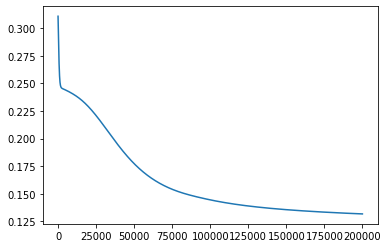

In [57]:
# Plotting the graph for the loss J decreases over time for 150000 iterations
x_arr = np.arange(0,200000,1)
loss_arr = np.array(loss_arr)
plt.plot(x_arr, loss_arr)

In [58]:
# Calculating the accuracy, test error
y_predicted, accuracy, test_error = predict_values(X_test, Y_test, weights)
print('Accuracy: ', accuracy)
print('Test Error: ', test_error * 100, "%" )

CORRECT 43
Accuracy:  95.55555555555556
Test Error:  6.981711963701047 %


In [59]:
# Method to plot the decision boundary 
# Uses the first two columns of the data for fitting the model as 
# we need to find the predicted value for every point in the scatter plot.

# Get the updated final features weights
weight_final = weights[0]

# Cleaning the values of X, Y from the data
X = np.array(x)
# dtype is a numpy.object, converting the array into astype(float)
# otherwise it will show a message saying numpy.float64 has no attribute log10
X = X.astype(float) 
n = X.shape[0]
Y = np.array(y).reshape(n, 1)
Y = Y.astype(float) 

# Implementing a mesh grid-style scatter plot

# Step size in the mesh
h = 0.02 
# Create sample points in a uniform grid to feed them to the classifier.
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Flatten the 2D array into 1D and getting the transpose of it
new_ravel_array = np.array([xx.ravel(), yy.ravel()]).T

In [60]:
# Method to predict to capture their prediction of y values 
def predict_values_mesh(X_test, weights):
    weights_1 = weights[0]
    weights_2 = weights[1]
    
    # Forward pass
    z_1 = np.dot(X_test, weights_1)
    act_1 = activation_func(z_1)
    z_2 = np.dot(act_1, weights_2)
    y_predicted = activation_func(z_2)
    print(y_predicted)

    for i, val in enumerate(y_predicted):
        if val >= 0.5:
            y_predicted[i] = 1
        else:
            y_predicted[i] = 0
    
    return y_predicted

In [61]:
# Updating the flattened array with a column for bias as weights is of shape (3, 6)
final_bias_array = np.hstack((np.ones((new_ravel_array.shape[0], 1)), new_ravel_array))

# Return the y-predited values 
y_predicted_new = predict_values_mesh(final_bias_array, weights)

# Reshaping the size with respect to 'xx' shape to plot
y_predicted_new = y_predicted_new.reshape(xx.shape)
y_predicted_new.shape

[[0.82166025]
 [0.82330494]
 [0.82489828]
 ...
 [0.37781666]
 [0.38696305]
 [0.39615449]]


(220, 280)

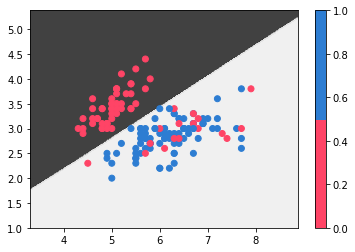

In [62]:
# Plot the decision boundary
colors=['#ff4466', '#2d7dd2']
plt.contourf(xx, yy, y_predicted_new, cmap='binary_r', alpha=0.8)
plt.scatter(X[:, 1], X[:, 2], c=Y[:,0], cmap=matplotlib.colors.ListedColormap(colors))
plt.colorbar()
plt.show()